In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartiflette import carti_download
import plotly.express as px

ImportError: cannot import name 'carti_communes' from 'cartiflette' (/opt/python/lib/python3.13/site-packages/cartiflette/__init__.py)

In [4]:
df_patientele = pd.read_csv("Bases de données/patientele.csv", sep=";")
df_patientele['nombre_patients_uniques'] = pd.to_numeric(df_patientele['nombre_patients_uniques'],errors='coerce')
df_patientele.columns = df_patientele.columns.str.replace("\ufeff", "", regex=False).str.strip()

df_patientele_2017 = df_patientele[(df_patientele['annee'] == 2017) & (df_patientele['profession_sante'] == "Médecins généralistes (hors médecins à expertise particulière - MEP)")]           

In [5]:
df_patientele.head()

,annee,profession_sante,region,libelle_region,departement,libelle_departement,nombre_patients_uniques,nombre_patients_medecin_traitant,vision generale all,vision_generale_prescriptions,vision profession territoire,patients_medecin_traitant_integer,patients_uniques_integer
0,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,39,Jura,1309.0,NC,oui,oui,oui,NaN,1309.0
1,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,58,Nièvre,2123.0,NC,oui,oui,oui,NaN,2123.0
2,2017,Anesthésistes-réanimateurs,27,Bourgogne-Franche-Comté,89,Yonne,3634.0,NC,oui,oui,oui,NaN,3634.0
3,2017,Anesthésistes-réanimateurs,28,Normandie,14,Calvados,2512.0,NC,oui,oui,oui,NaN,2512.0
4,2017,Anesthésistes-réanimateurs,28,Normandie,76,Seine-Maritime,2938.0,NC,oui,oui,oui,NaN,2938.0


## Carte des pays différents

(np.float64(-5.876307480152819),
 np.float64(10.295160325375349),
 np.float64(40.84582809366395),
 np.float64(51.57675902873196))

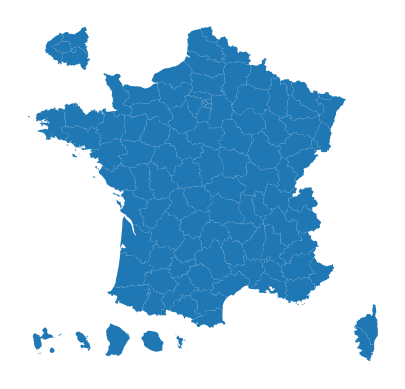

In [6]:
# Téléchargement des informations géospatiales des départements français (DROM compris)

departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# On modifie le code des départements : on rajoute un 0 à ceux qui ont un code à deux chiffres
#departements['INSEE_DEP'] = departements['INSEE_DEP'].str.zfill(3)

# Test d'affichage de la carte
departements.plot().axis('off')

In [7]:
Carte_2017 = df_patientele_2017.copy()
Carte_2017['INSEE_DEP'] = Carte_2017['departement'].str[:3].astype(str)
Carte_2017 = departements.merge(Carte_2017, on='INSEE_DEP', how='left')

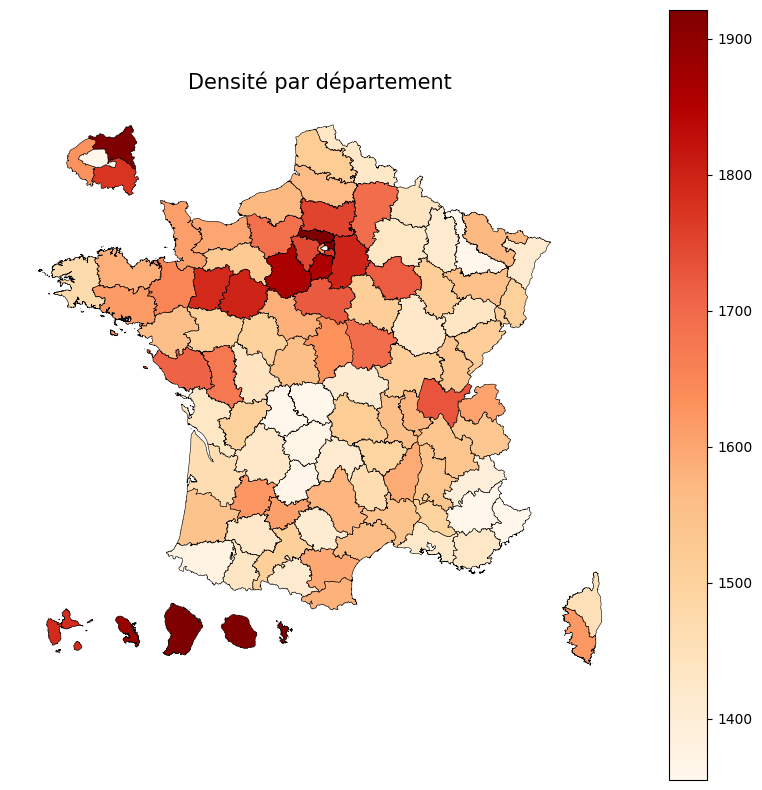

In [8]:
# Tracé pour l'année 2017

vmin = Carte_2017['nombre_patients_uniques'].quantile(0.05)
vmax = Carte_2017['nombre_patients_uniques'].quantile(0.95)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Carte_2017.plot(
    column='nombre_patients_uniques', 
    cmap='OrRd',
    vmin=vmin,
    vmax=vmax,      
    linewidth=0.4,
    edgecolor='black',
    legend=True,       
    ax=ax
)

# On supprime les axes
ax.axis('off')  
ax.set_title("Densité par département", fontsize=15)
plt.show()

## Graphique Evolution par année

In [9]:
df_medecin = df_patientele[(df_patientele['profession_sante'] == "Médecins généralistes (hors médecins à expertise particulière - MEP)")]  
df_graphique_évol = df_medecin[["annee","libelle_departement","patients_uniques_integer"]]
df_graphique_évol.info

<bound method DataFrame.info of        annee libelle_departement  patients_uniques_integer
414     2017          Guadeloupe                    1788.0
415     2017    Tout département                    2579.0
416     2017    Tout département                    2134.0
417     2017             Mayotte                    3166.0
418     2017               Paris                    1355.0
...      ...                 ...                       ...
39818   2024         Puy-de-Dôme                    1548.0
39819   2024               Rhône                    1699.0
39820   2024    Tout département                    1569.0
39821   2024     Alpes-Maritimes                    1605.0
39822   2024                 Var                    1594.0

[1080 rows x 3 columns]>

/tmp/ipykernel_1898/3226274543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annee'] = pd.to_numeric(df['annee'],errors='coerce')
/tmp/ipykernel_1898/3226274543.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


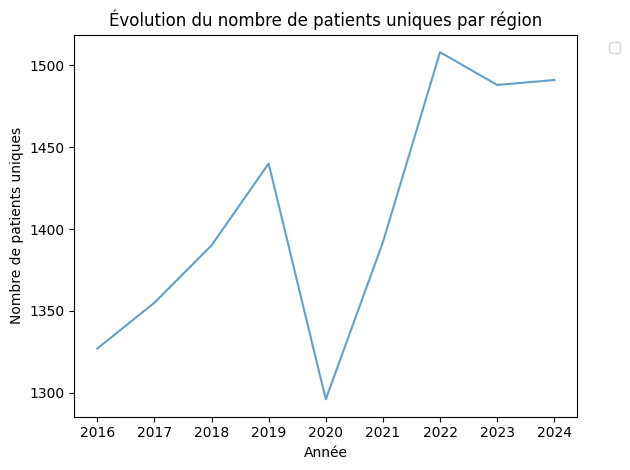

,annee,libelle_departement,patients_uniques_integer
15797,2016,Paris,1327.0
418,2017,Paris,1355.0
7546,2018,Paris,1390.0
4435,2019,Paris,1440.0
2551,2020,Paris,1296.0
4835,2021,Paris,1392.0
29530,2022,Paris,1508.0
12807,2023,Paris,1488.0
14357,2024,Paris,1491.0


In [10]:
L = []

df = df_graphique_évol[df_graphique_évol["libelle_departement"] == "Paris"]
df['annee'] = pd.to_numeric(df['annee'],errors='coerce')
df = df.sort_values(by='annee')
df.head()

plt.plot(df['annee'],
        df['patients_uniques_integer'],
        alpha=0.7
    )

plt.xlabel("Année")
plt.ylabel("Nombre de patients uniques")
plt.title("Évolution du nombre de patients uniques par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


df.head(10)

/tmp/ipykernel_1898/4190106649.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


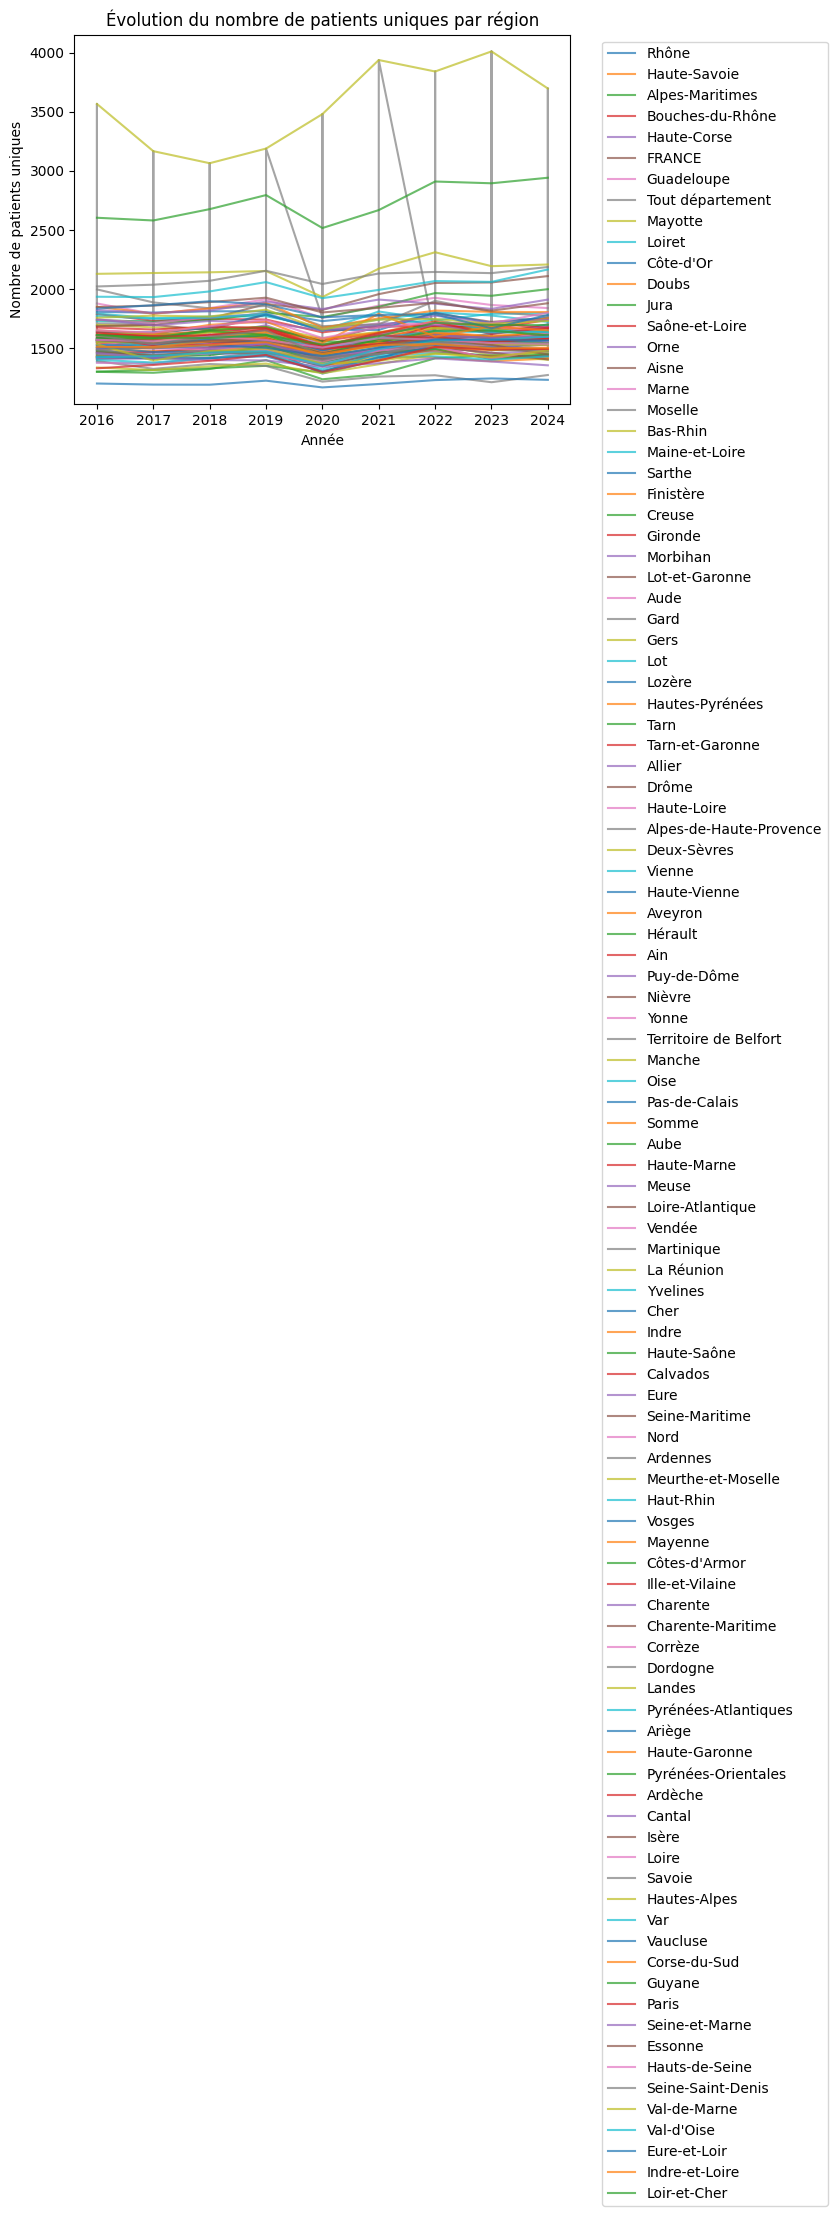

annee
2016    1
2017    1
2018    1
2019    1
2020    1
2021    1
2022    1
2023    1
2024    1
Name: count, dtype: int64

In [11]:
df_graphique_évol = df_graphique_évol.sort_values(by='annee')

for region in df_graphique_évol['libelle_departement'].unique():
    tmp = df_graphique_évol[df_graphique_évol['libelle_departement'] == region]
    plt.plot(
        tmp['annee'],
        tmp['patients_uniques_integer'],
        label=region,
        alpha=0.7
    )

plt.xlabel("Année")
plt.ylabel("Nombre de patients uniques")
plt.title("Évolution du nombre de patients uniques par région")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
df.head(10)
df.shape
df['annee'].value_counts().sort_index()

In [23]:
df = pd.read_excel("Bases de données/medecins_commune_2025.xlsx")
df.head(10)

,Cartographie Interactive de la Démographie Médicale,Unnamed: 1,Unnamed: 2
0,Référentiel géographique : France par commune ...,NaN,NaN
1,NaN,NaN,Indic1
2,Code,Libellé,"Les médecins généralistes, toutes activités et..."
3,01001,L'Abergement-Clémenciat,0
4,01002,L'Abergement-de-Varey,0
5,01004,Ambérieu-en-Bugey,30
6,01005,Ambérieux-en-Dombes,4
7,01006,Ambléon,0
8,01007,Ambronay,2
9,01008,Ambutrix,1


In [25]:
# code commune en string à 5 chiffres
df["Cartographie Interactive de la Démographie Médicale"] = df["Cartographie Interactive de la Démographie Médicale"].astype(str).str.zfill(5)

df.head()

,Cartographie Interactive de la Démographie Médicale,Unnamed: 1,Unnamed: 2
0,Référentiel géographique : France par commune ...,NaN,NaN
1,00nan,NaN,Indic1
2,0Code,Libellé,"Les médecins généralistes, toutes activités et..."
3,01001,L'Abergement-Clémenciat,0
4,01002,L'Abergement-de-Varey,0


In [ ]:
gdf = carti_download(
    values=df.set_index("Cartographie Interactive de la Démographie Médicale")["Unnamed: 2"],
    level="COMMUNE",
    year=2023,
    simplify=True
)

TypeError: carti_download() missing 1 required positional argument: 'values'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf.plot(
    column="nb_medecins",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={
        "color": "lightgrey",
        "label": "Données manquantes"
    }
)

ax.set_title("Nombre de médecins par commune", fontsize=14)
ax.axis("off")

plt.show()
